In [1]:
# import the necessary libraries 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from itertools import product 


In [2]:

# set the param 
plt.rc('figure', autolayout=True) 
plt.rc('image', cmap='magma') 


In [3]:

# define the kernel 
kernel = tf.constant([[-1, -1, -1], 
					[-1, 8, -1], 
					[-1, -1, -1], 
				]) 


In [5]:

# load the image 
image = tf.io.read_file('image.png') 
image = tf.io.decode_jpeg(image, channels=1) 
image = tf.image.resize(image, size=[300, 300]) 


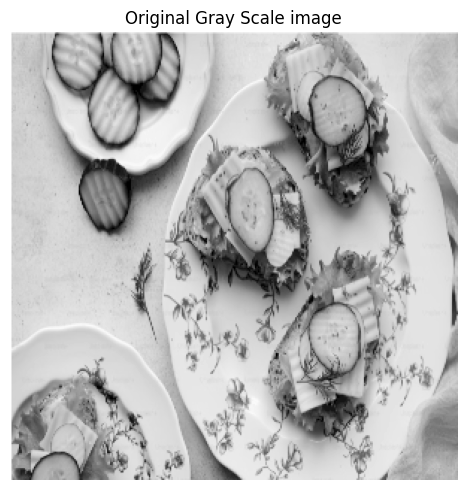

In [9]:
# plot the image 
img = tf.squeeze(image).numpy() 
plt.figure(figsize=(5, 5)) 
plt.imshow(img, cmap='gray') 
plt.axis('off') 
plt.title('Original Gray Scale image') 
plt.show(); 

In [6]:
# Reformat 
image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
image = tf.expand_dims(image, axis=0) 
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1]) 
kernel = tf.cast(kernel, dtype=tf.float32) 

In [7]:

# convolution layer 
conv_fn = tf.nn.conv2d 
image_filter = conv_fn( 
	input=image, 
	filters=kernel, 
	strides=1, # or (1, 1) 
	padding='SAME', 
) 


Text(0.5, 1.0, 'Activation')

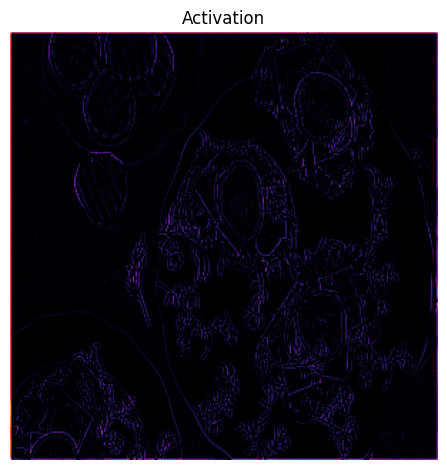

In [8]:
# activation layer 
relu_fn = tf.nn.relu 
# Image detection 
image_detect = relu_fn(image_filter) 
plt.imshow( 
	# Reformat for plotting 
	tf.squeeze(image_detect) 
) 
plt.axis('off') 
plt.title('Activation') 